## Keyword database statistics

The keyword databse was extracted from **TEDLIUM third release**. 1000 words were extracted. We describe in this notebook a few characteristics of this database

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav

Load the 1000 words and their absolute path

In [2]:
words_1000 = [] 
with open(os.path.join(os.path.abspath('../'),'1000-midlong'), 'r') as thousand_words:
    for word in thousend_words:
        words_1000.append(word.strip())

In [15]:
path = os.path.abspath("../../../Datasets/TEDLIUM_release-3/data/1000_kws_db/")
filenames = []

for word in words_1000:
    current_path = os.path.join(path, word[0], word) 
    for _, _, files in os.walk(current_path):
        for file in files:
            filenames.append(os.path.join(current_path, file))

In [24]:
len(filenames)

1389819

#### 1. Keyword samples distribution 

In [16]:
word_less_1000 = {}
word_greater_1000 = {}
for word in tqdm(words_1000):
    current_path = os.path.join(path, word[0], word)
    nb_samples = len([file for file in os.listdir(current_path) if file.endswith('.wav') and not file.startswith('.')])
    if nb_samples >= 1000:
        word_greater_1000[word] = nb_samples
    else:
        word_less_1000[word] = nb_samples

100%|██████████| 1000/1000 [00:07<00:00, 133.84it/s]


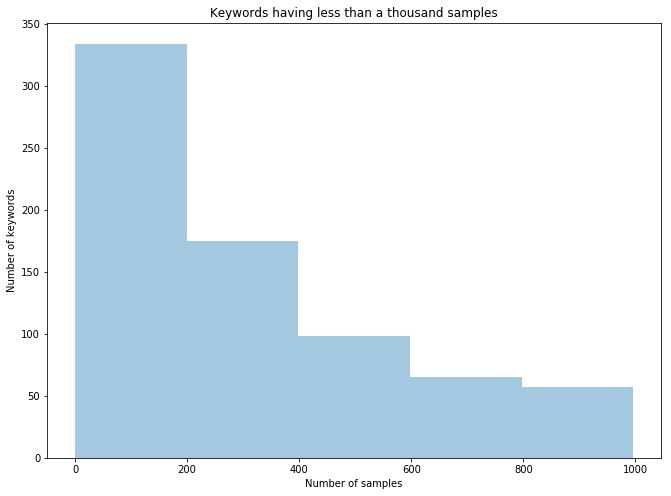

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
ax.set_title('Keywords having less than a thousand samples')
ax.set_xlabel('Number of samples')
ax.set_ylabel('Number of keywords')
ax = sns.distplot(list(word_less_1000.values()), bins=5, kde=False)

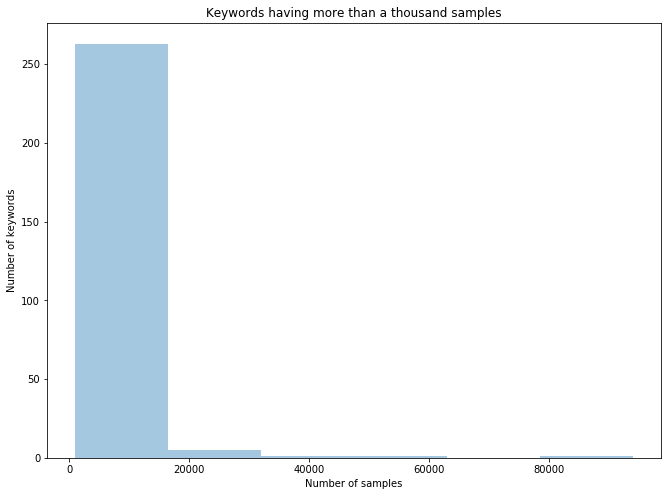

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
ax.set_title('Keywords having more than a thousand samples')
ax.set_xlabel('Number of samples')
ax.set_ylabel('Number of keywords')
ax = sns.distplot(list(word_greater_1000.values()), bins=6, kde=False)

In [19]:
len(word_greater_1000)

271

Among the all keywords, **271** of them have more than a thousand samples

List of keywords having more than 3000 thousands sampels

In [20]:
l_3000 = sorted(list(filter(lambda x: x[1]>1000  , word_greater_1000.items())), key=lambda x: x[1], reverse=True)

In [21]:
len(l_3000)

271

In [22]:
l_3000

[('that', 94035),
 ('this', 47958),
 ('they', 33345),
 ('have', 27665),
 ('what', 26229),
 ('with', 25255),
 ('about', 20905),
 ('there', 18863),
 ('people', 16409),
 ('like', 15893),
 ('from', 15714),
 ('these', 13985),
 ('just', 13866),
 ('when', 13847),
 ('because', 12648),
 ('very', 11829),
 ('more', 11236),
 ('going', 11102),
 ('their', 10806),
 ('them', 10676),
 ('were', 10646),
 ('your', 10423),
 ('would', 10322),
 ('know', 10131),
 ('think', 10078),
 ('which', 9979),
 ('really', 9543),
 ('then', 8887),
 ('some', 8822),
 ('here', 8485),
 ('time', 8275),
 ('into', 8144),
 ('world', 7988),
 ('where', 7853),
 ('will', 7823),
 ('actually', 7725),
 ('could', 7568),
 ('other', 7238),
 ('things', 7212),
 ('years', 7173),
 ('been', 7082),
 ('want', 6945),
 ('make', 6909),
 ('those', 6568),
 ('first', 6244),
 ('than', 6219),
 ('something', 6170),
 ('well', 5892),
 ('also', 5812),
 ('right', 5786),
 ('even', 5587),
 ('look', 5585),
 ('most', 5556),
 ('over', 5451),
 ('little', 5353),
 ('o

#### 2. Keyword length distribution

In [23]:
word_durations = []

for file in tqdm(filenames):
    fs, sig = wav.read(file)
    duration = float(len(sig)) / fs
    word_durations.append(duration)

100%|██████████| 1389819/1389819 [07:28<00:00, 3101.58it/s]


In [14]:
word_dur_less_1 = list(filter(lambda x: x<=1.0, word_durations))
word_dur_greater_1 = list(filter(lambda x: x>1.0, word_durations))

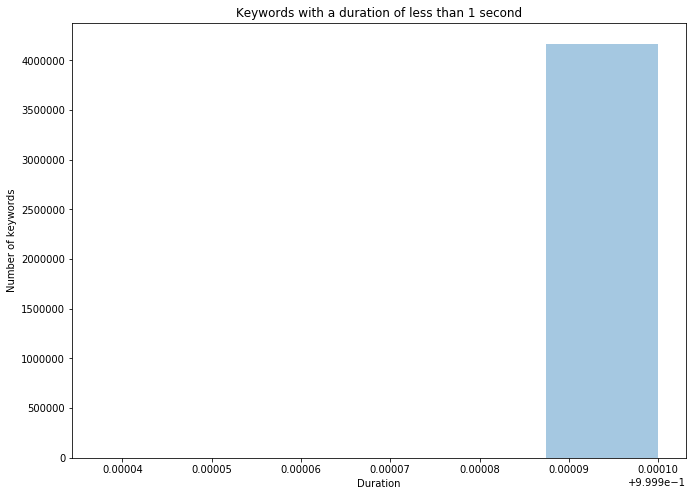

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
ax.set_title('Keywords with a duration of less than 1 second')
ax.set_xlabel('Duration')
ax.set_ylabel('Number of keywords')
ax = sns.distplot(word_dur_less_1, bins= 5, kde=False)

In [18]:
len(word_dur_greater_1)

3

In [19]:
len(list(filter(lambda x: x<=0.6, word_durations)))

0

In [20]:
(len(word_dur_greater_1) / len(word_durations)) * 100

7.195181530832431e-05

Out of the 4169457 audio samples only 115 of them (**~ 0.027%**) have a duration of more than 1 second

In [22]:
np.mean(word_dur_less_1)

0.9999999999550301

The mean duration of an audio samples is **283.3 milliseconds**

#### 3. Number of phonemes per keyword

In [16]:
import nltk
arpabet = nltk.corpus.cmudict.dict()

In [17]:
word_phonemes_len = {}
for word in tqdm(words_1000):
    try:
        phonemes = arpabet[word][0]
        word_phonemes_len[word] = len(phonemes)
    except:
        print(word)

100%|██████████| 1000/1000 [00:00<00:00, 157983.50it/s]

blog
login
html
pics
homepage


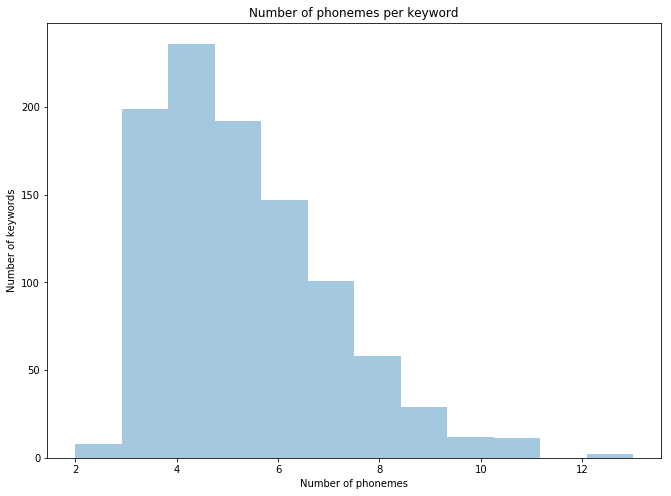

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
ax.set_title('Number of phonemes per keyword')
ax.set_xlabel('Number of phonemes')
ax.set_ylabel('Number of keywords')
ax = sns.distplot(list(word_phonemes_len.values()),bins=12, kde=False)

In [19]:
np.mean(list(word_phonemes_len.values()))

5.123618090452261

On average the keywords in the database have **5 phonemes**

In [21]:
sorted(list(filter(lambda x: x[1]>850 , word_less_1000.items())), key=lambda x: x[1])

[('course', 852),
 ('started', 865),
 ('thought', 874),
 ('went', 876),
 ('tell', 879),
 ('should', 887),
 ('find', 893),
 ('sort', 901),
 ('after', 906),
 ('change', 907),
 ('today', 937),
 ('point', 938),
 ('percent', 946),
 ('fact', 955),
 ('another', 959),
 ('last', 985)]

In [25]:
arpabet['world'][0]

['W', 'ER1', 'L', 'D']

In [26]:
arpabet['people'][0]

['P', 'IY1', 'P', 'AH0', 'L']